In [1]:
import pandas as pd

In [2]:
#pip install pyarrow

In [3]:
data = pd.read_csv('merged_files_enron123.csv', low_memory=False)

In [4]:
data.sample(5)

,text,label
7319,"Subject: re : resume ,\nmolly ,\ni would like ...",ham
15995,Subject: top 50\nomigod .\nshall i bow down up...,ham
888,"Subject: dpie , generic drugs at low prices\nc...",spam
7983,Subject: revised budget allocations\nplease di...,ham
2528,"Subject: hpl nom for dec . 15 , 2000\n( see at...",ham


In [5]:
#Checking the shape of Data
data.shape

(16541, 2)

In [6]:
#Checking Null Values in the data
data.isnull().sum()

text     0
label    0
dtype: int64

In [7]:
data['label'].unique()

array(['spam', 'ham'], dtype=object)

In [8]:
data['label'].value_counts()

ham     12045
spam     4496
Name: label, dtype: int64

In [9]:
data.head()

,text,label
0,"Subject: what up , , your cam babe\nwhat are y...",spam
1,Subject: want to make more money ?\norder conf...,spam
2,Subject: food for thoughts\n[\njoin now - take...,spam
3,Subject: miningnews . net newsletter - tuesday...,spam
4,Subject: your pharmacy ta\nwould you want chea...,spam


In [10]:
#missing values
data.isnull().sum()

text     0
label    0
dtype: int64

In [11]:
#duplicate values
data.duplicated().sum()

484

In [12]:
#remove duplicates
data = data.drop_duplicates(keep='first')

In [13]:
data.shape

(16057, 2)

EDA

In [14]:
data.rename(columns = {'text':'text', 'label':'spam'},
                         inplace = True)

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['spam'] = le.fit_transform(data['spam'])

In [16]:
data.head()

,text,spam
0,"Subject: what up , , your cam babe\nwhat are y...",1
1,Subject: want to make more money ?\norder conf...,1
2,Subject: food for thoughts\n[\njoin now - take...,1
3,Subject: miningnews . net newsletter - tuesday...,1
4,Subject: your pharmacy ta\nwould you want chea...,1


In [17]:
data['spam'].value_counts()

0    11599
1     4458
Name: spam, dtype: int64

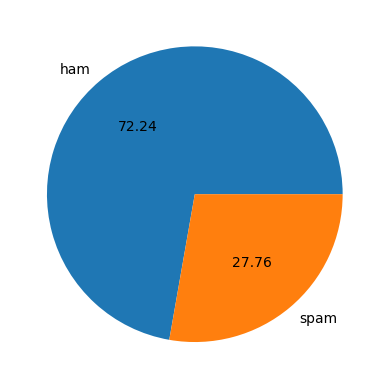

In [18]:
import matplotlib.pyplot as plt
plt.pie(data['spam'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [19]:
import nltk
import urllib.request

In [20]:
from nltk.tokenize import word_tokenize

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/kriti/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
#number of characters
data['num_characters']=data['text'].apply(len)

In [23]:
#number of words
data['num_words']=data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
data.head()

,text,spam,num_characters,num_words
0,"Subject: what up , , your cam babe\nwhat are y...",1,862,186
1,Subject: want to make more money ?\norder conf...,1,380,74
2,Subject: food for thoughts\n[\njoin now - take...,1,86,20
3,Subject: miningnews . net newsletter - tuesday...,1,5540,1028
4,Subject: your pharmacy ta\nwould you want chea...,1,94,21


In [25]:
#tokenizing on basis of sentences
data['num_sentences']=data['text'].apply(lambda x:len(nltk.sent_tokenize(x))) 

In [26]:
data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,16057.000000,16057.000000,16057.000000
mean,1645.824127,346.216790,19.776920
std,5405.912188,1075.734535,64.979658
min,10.000000,2.000000,1.000000
25%,367.000000,78.000000,5.000000
50%,765.000000,169.000000,10.000000
75%,1647.000000,358.000000,19.000000
max,228377.000000,45454.000000,2827.000000


In [27]:
#ham
data[data['spam'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,11599.000000,11599.000000,11599.000000
mean,1770.856194,378.027416,20.485645
std,6235.605861,1241.130929,74.359737
min,13.000000,3.000000,1.000000
25%,375.500000,81.000000,5.000000
50%,828.000000,183.000000,9.000000
75%,1726.000000,381.000000,19.000000
max,228377.000000,45454.000000,2827.000000


In [28]:
#spam
data[data['spam'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4458.000000,4458.000000,4458.000000
mean,1320.510767,263.450651,17.932930
std,1987.346285,388.347196,28.591664
min,10.000000,2.000000,1.000000
25%,349.000000,73.000000,5.000000
50%,653.000000,138.000000,11.000000
75%,1355.000000,277.750000,20.000000
max,27940.000000,6131.000000,693.000000


In [29]:
import seaborn as sns


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

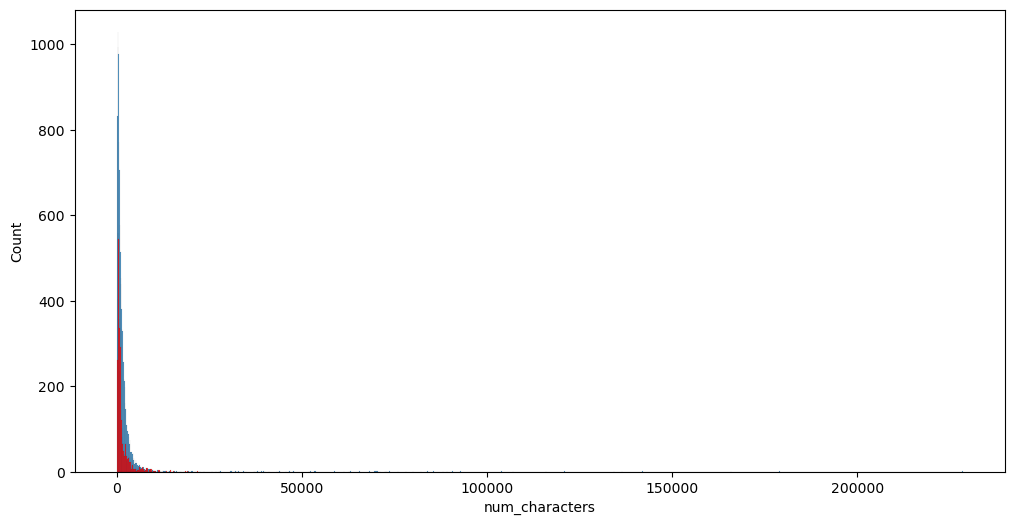

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['spam']==0]['num_characters'])
sns.histplot(data[data['spam']==1]['num_characters'], color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

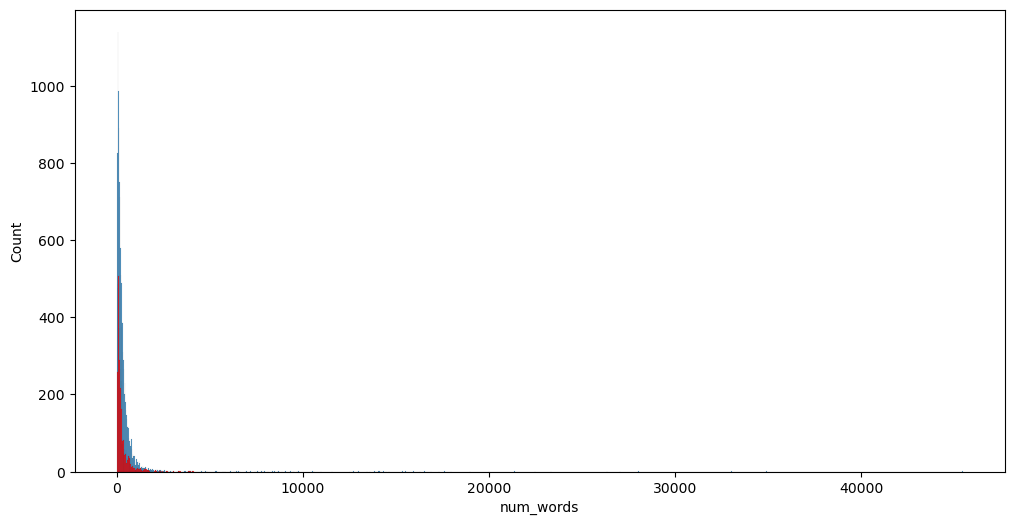

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['spam']==0]['num_words'])
sns.histplot(data[data['spam']==1]['num_words'], color='red')

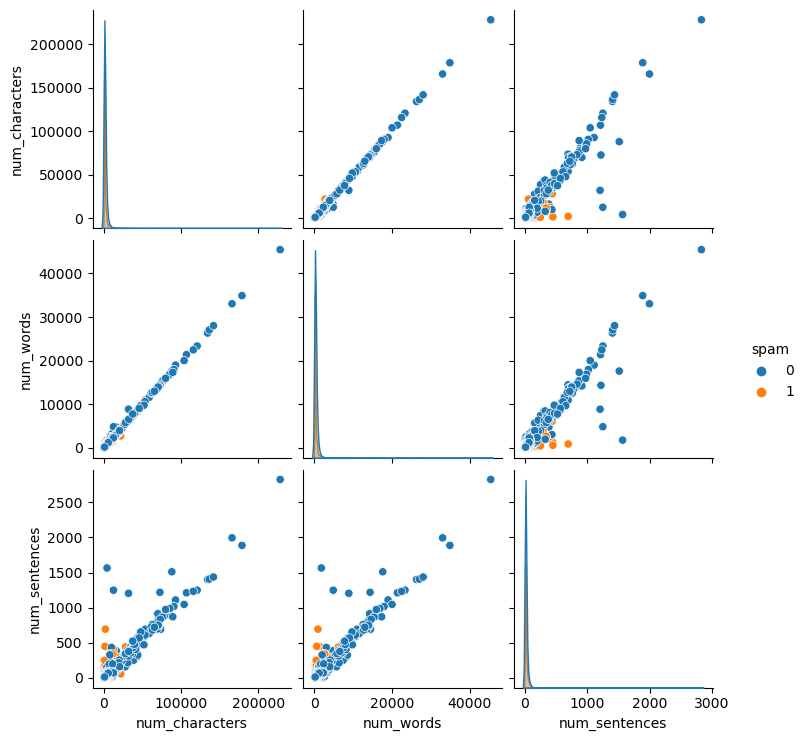

In [32]:
sns.pairplot(data, hue='spam')

<AxesSubplot:>

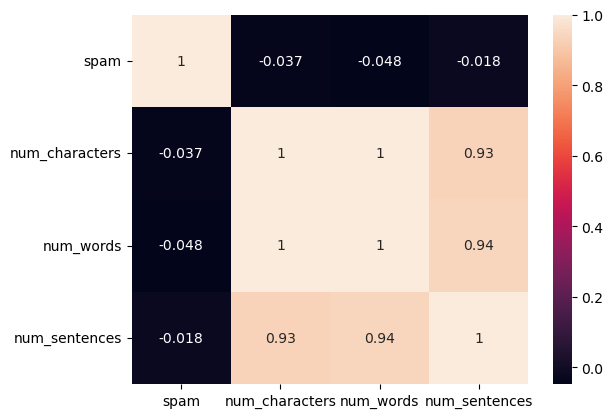

In [33]:
sns.heatmap(data.corr(), annot=True)

Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming


In [34]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [35]:
from nltk.corpus import stopwords

In [36]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
# def transform_text(text):
#     text = text.lower()
#     text = nltk.word_tokenize(text)
    
#     y=[]
#     for i in text:
#         if i.isalnum():
#             y.append(i)
    
#     text = y[:] #mutatable so cloning has to be done
#     y.clear()
    
#     for i in text:
#         if i not in stopwords.words('english') and i not in string.punctuation and i !='subject':
#             y.append(i)
            
#     text = y[:]
#     y.clear()
    
#     for i in text:
#         y.append(ps.stem(i))
        
        
#     return " ".join(y) #returning as string

In [38]:
stop_words = set(stopwords.words('english'))
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            if i not in stop_words and i not in string.punctuation and i !='subject':
                y.append(ps.stem(i))
        
        
    return " ".join(y) #returning as string


In [39]:
data['text'][0]

"Subject: what up , , your cam babe\nwhat are you looking for ?\nif your looking for a companion for friendship , love , a date , or just good ole '\nfashioned * * * * * * , then try our brand new site ; it was developed and created\nto help anyone find what they ' re looking for . a quick bio form and you ' re\non the road to satisfaction in every sense of the word . . . . no matter what\nthat may be !\ntry it out and youll be amazed .\nhave a terrific time this evening\ncopy and pa ste the add . ress you see on the line below into your browser to come to the site .\nhttp : / / www . meganbang . biz / bld / acc /\nno more plz\nhttp : / / www . naturalgolden . com / retract /\ncounterattack aitken step preemptive shoehorn scaup . electrocardiograph movie honeycomb . monster war brandywine pietism byrne catatonia . encomia lookup intervenor skeleton turn catfish .\n"

In [40]:
transform_text('Subject here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image')

'list clear benefit creativ hand made origin logo special done reflect distinct compani imag'

In [41]:
transform_text(data['text'][0])

'cam babe look look companion friendship love date good ole fashion tri brand new site develop creat help anyon find look quick bio form road satisfact everi sens word matter may tri youll amaz terrif time even copi pa ste add ress see line browser come site http www meganbang biz bld acc plz http www naturalgolden com retract counterattack aitken step preemptiv shoehorn scaup electrocardiograph movi honeycomb monster war brandywin pietism byrn catatonia encomia lookup intervenor skeleton turn catfish'

In [42]:
data['transformed_text']=data['text'].apply(transform_text)

In [43]:
data.head()

,text,spam,num_characters,num_words,num_sentences,transformed_text
0,"Subject: what up , , your cam babe\nwhat are y...",1,862,186,18,cam babe look look companion friendship love d...
1,Subject: want to make more money ?\norder conf...,1,380,74,7,want make money order confirm order ship janua...
2,Subject: food for thoughts\n[\njoin now - take...,1,86,20,1,food thought join take free tour click remov
3,Subject: miningnews . net newsletter - tuesday...,1,5540,1028,65,miningnew net newslett tuesday januari 13 2004...
4,Subject: your pharmacy ta\nwould you want chea...,1,94,21,4,pharmaci ta would want cheap perscript http ww...


In [44]:
#word cloud, will highlight the important words
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [45]:
spam_wc = wc.generate(data[data['spam']==1]['transformed_text'].str.cat(sep=" "))

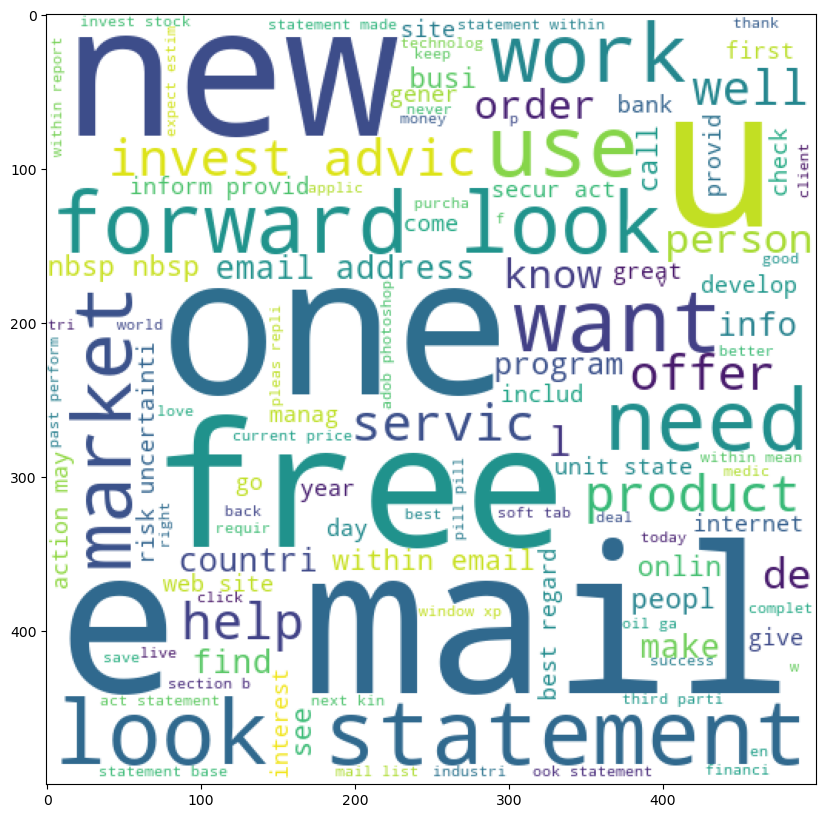

In [46]:
plt.figure(figsize=(10,10))
plt.imshow(spam_wc)

In [47]:
ham_wc = wc.generate(data[data['spam']==0]['transformed_text'].str.cat(sep=" "))

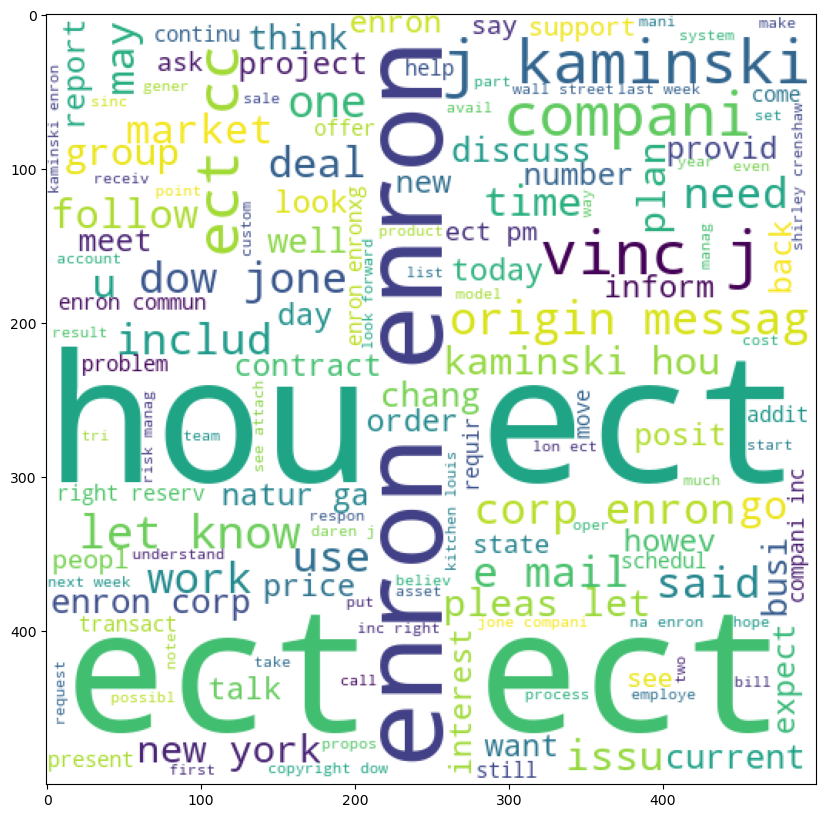

In [48]:
plt.figure(figsize=(10,10))
plt.imshow(ham_wc)

In [49]:
data.head()

,text,spam,num_characters,num_words,num_sentences,transformed_text
0,"Subject: what up , , your cam babe\nwhat are y...",1,862,186,18,cam babe look look companion friendship love d...
1,Subject: want to make more money ?\norder conf...,1,380,74,7,want make money order confirm order ship janua...
2,Subject: food for thoughts\n[\njoin now - take...,1,86,20,1,food thought join take free tour click remov
3,Subject: miningnews . net newsletter - tuesday...,1,5540,1028,65,miningnew net newslett tuesday januari 13 2004...
4,Subject: your pharmacy ta\nwould you want chea...,1,94,21,4,pharmaci ta would want cheap perscript http ww...


In [50]:
spam_corpus = []
for msg in data[data['spam']== 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [51]:
len(spam_corpus)

605802

/Users/kriti/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


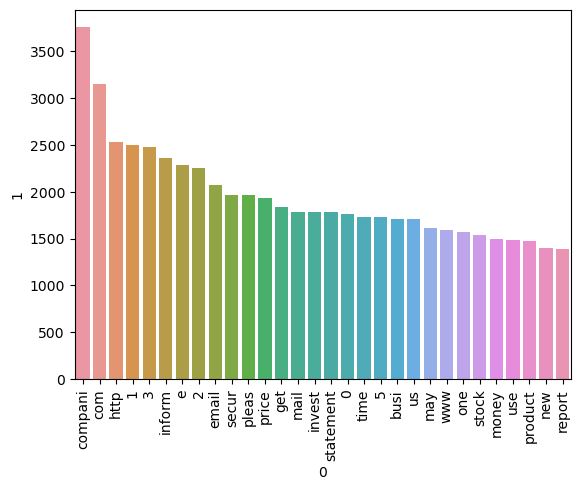

In [52]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [53]:
ham_corpus = []
for msg in data[data['spam']== 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [54]:
len(ham_corpus)

2101885

/Users/kriti/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


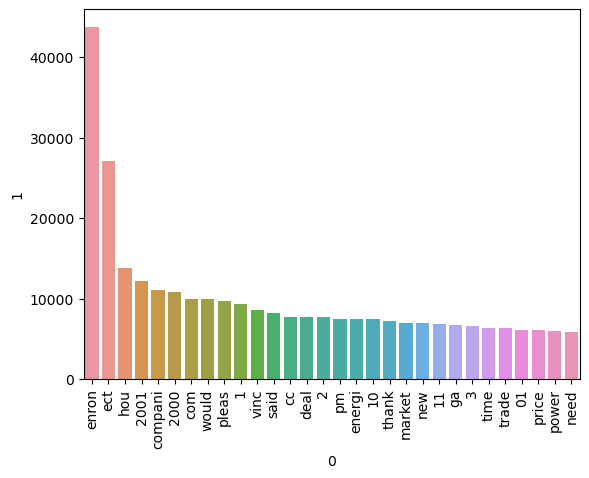

In [55]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [56]:
#using bag of words to vectorize
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [57]:
X = cv.fit_transform(data['transformed_text']).toarray()

In [58]:
X.shape

(16057, 79886)

In [59]:
y = data['spam'].values

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)


In [62]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [63]:
#making object of each
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [64]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(classification_report(y_test, y_pred1))
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2300
           1       0.97      0.82      0.89       912

    accuracy                           0.94      3212
   macro avg       0.95      0.91      0.93      3212
weighted avg       0.94      0.94      0.94      3212

0.9427148194271482
[[2279   21]
 [ 163  749]]
0.9727272727272728


In [65]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(classification_report(y_test, y_pred2))
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2300
           1       0.97      0.98      0.97       912

    accuracy                           0.98      3212
   macro avg       0.98      0.98      0.98      3212
weighted avg       0.98      0.98      0.98      3212

0.9847447073474471
[[2270   30]
 [  19  893]]
0.9674972914409534


In [66]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(classification_report(y_test, y_pred3))
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2300
           1       0.98      0.81      0.89       912

    accuracy                           0.94      3212
   macro avg       0.96      0.90      0.92      3212
weighted avg       0.94      0.94      0.94      3212

0.9420921544209215
[[2286   14]
 [ 172  740]]
0.9814323607427056


In [67]:
#Using Tfidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [68]:
X = tfidf.fit_transform(data['transformed_text']).toarray()

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [70]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(classification_report(y_test, y_pred1))
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2300
           1       0.95      0.86      0.91       912

    accuracy                           0.95      3212
   macro avg       0.95      0.92      0.94      3212
weighted avg       0.95      0.95      0.95      3212

0.949252801992528
[[2262   38]
 [ 125  787]]
0.953939393939394


In [71]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(classification_report(y_test, y_pred2))
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      2300
           1       0.99      0.68      0.81       912

    accuracy                           0.91      3212
   macro avg       0.94      0.84      0.87      3212
weighted avg       0.92      0.91      0.90      3212

0.9078455790784558
[[2296    4]
 [ 292  620]]
0.9935897435897436


In [72]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(classification_report(y_test, y_pred3))
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2300
           1       0.98      0.81      0.89       912

    accuracy                           0.94      3212
   macro avg       0.96      0.90      0.92      3212
weighted avg       0.94      0.94      0.94      3212

0.9420921544209215
[[2286   14]
 [ 172  740]]
0.9814323607427056


In [73]:
#tfidf + bnb is working the best

In [74]:

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train,y_train)
y_pred4 = neigh.predict(X_test)
print(classification_report(y_test, y_pred4))
print(confusion_matrix(y_test, y_pred4))
print(accuracy_score(y_test, y_pred4))
print(precision_score(y_test, y_pred4))

              precision    recall  f1-score   support

           0       1.00      0.58      0.73      2300
           1       0.49      1.00      0.65       912

    accuracy                           0.70      3212
   macro avg       0.74      0.79      0.69      3212
weighted avg       0.85      0.70      0.71      3212

[[1332  968]
 [   0  912]]
0.6986301369863014
0.4851063829787234


/Users/kriti/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [75]:
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train,y_train)
y_pred5 = neigh.predict(X_test)
print(classification_report(y_test, y_pred5))
print(confusion_matrix(y_test, y_pred5))
print(accuracy_score(y_test, y_pred5))
print(precision_score(y_test, y_pred5))

              precision    recall  f1-score   support

           0       1.00      0.58      0.73      2300
           1       0.49      1.00      0.65       912

    accuracy                           0.70      3212
   macro avg       0.74      0.79      0.69      3212
weighted avg       0.85      0.70      0.71      3212

[[1332  968]
 [   0  912]]
0.6986301369863014
0.4851063829787234


/Users/kriti/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [76]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,y_train)
y_pred6 = neigh.predict(X_test)
print(classification_report(y_test, y_pred6))
print(confusion_matrix(y_test, y_pred6))
print(accuracy_score(y_test, y_pred6))
print(precision_score(y_test, y_pred6))

              precision    recall  f1-score   support

           0       1.00      0.38      0.55      2300
           1       0.39      1.00      0.56       912

    accuracy                           0.56      3212
   macro avg       0.69      0.69      0.56      3212
weighted avg       0.83      0.56      0.55      3212

[[ 873 1427]
 [   0  912]]
0.5557285180572852
0.38991021804189824


/Users/kriti/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
